In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from lifestore_file import lifestore_products, lifestore_sales, lifestore_searches

In [3]:
#Se convierten a DataFrame las listas

pd_products = pd.DataFrame(lifestore_products, columns=['id_product', 'name', 'price', 'category', 'stock'])

pd_searches = pd.DataFrame(lifestore_searches, columns=['id_search', 'id product'])

pd_sales = pd.DataFrame(lifestore_sales, columns =['id_sale', 'id_product', 'score', 'date', 'refund'])
#score (from 1 to 5)
#refund (1 for true or 0 to false)

# Categorías

In [4]:
#Se obtienen las categorías diferentes
Categorias = list(set(pd_products['category']))

In [5]:
#Se hará un diccionario donde, por categoría, se tendrán los id_product que los componen
#así como el total de ventas, total de devoluciones, ventas netas y total de búsquedas de cada id_product

# categoria->id_product->ventas, búsquedas
dic_categ = {}

for categoria in Categorias:
    #Se encuentran todos los productos pertenecientes a "categoria"
    productosCat = pd_products[pd_products['category']==categoria]
    #Se crea un arreglo que contendrá la información de cada producto
    prods_cat = []
    for producto in range(len(productosCat)):
        #Se obtienen los id_product de los productos
        id_prod_Cat = productosCat.iloc[producto, 0]
        #Se calcula las ventas de cada producto
        Ventas_prod = pd_sales[pd_sales['id_product']==id_prod_Cat]
        NoVentas = len(Ventas_prod)
        #Se calcula las devoluciones de cada producto
        NoDevoluciones = len(Ventas_prod[Ventas_prod['refund']==1])
        #Se calcula las ventas netas de cada producto
        Ventas_net = NoVentas - NoDevoluciones
        #Se calculan las búsquedas de cada producto
        Busquedas_prod = pd_searches[pd_searches['id product']==id_prod_Cat]
        NoBusquedas = len(Busquedas_prod)
        #Se agrega la información al arreglo
        dic_prod = {'id': id_prod_Cat, 'Ventas brutas': NoVentas, 'Devoluciones': NoDevoluciones, 'Ventas netas': Ventas_net, 'Busquedas': NoBusquedas}
        prods_cat.append(dic_prod)
    dic_categ[categoria] = prods_cat

# Listado de productos con menores venta para cada categoría

In [6]:
Noproductos = 5

for categoria in Categorias:
    #Se crea un DataFrame de cada categoria
    df_categ = pd.DataFrame(dic_categ[categoria])
    #Se ordena de menor a mayor el DataFrame con respecto a Ventas netas
    df_sorted_cat = df_categ.sort_values(by='Ventas netas')
    print("\033[1m" + categoria + "\033[0m")
    print('ID\t Ventas netas\t Nombre')
    item = 0
    while item < Noproductos and item < len(df_sorted_cat):
        id_ = df_sorted_cat.iloc[item, 4]
        idx = pd_products[pd_products['id_product']==id_].index.item()
        name = pd_products.iloc[idx, 1]
        ventas = df_sorted_cat.iloc[item, 3]
        print(id_, '\t', ventas, '\t', name)
        item+=1
    print('\n')

tarjetas madre
ID	 Ventas netas	 Nombre
37 	 0 	 Tarjeta Madre ASRock ATX Z490 STEEL LEGEND, S-1200, Intel Z490, HDMI, 128GB DDR4 para Intel
43 	 0 	 Tarjeta Madre ASUS ATX ROG STRIX Z390-E GAMING, S-1151, Intel Z390, HDMI, 64GB DDR4 para Intel
41 	 0 	 Tarjeta Madre ASUS micro ATX Prime H370M-Plus/CSM, S-1151, Intel H370, HDMI, 64GB DDR4 para Intel
39 	 0 	 ASUS T. Madre uATX M4A88T-M, S-AM3, DDR3 para Phenom II/Athlon II/Sempron 100
38 	 0 	 Tarjeta Madre Gigabyte Micro ATX H310M DS2 2.0, S-1151, Intel H310, 32GB DDR4 para Intel 


discos duros
ID	 Ventas netas	 Nombre
53 	 0 	 SSD Addlink Technology S70, 512GB, PCI Express 3.0, M.2
55 	 0 	 SSD para Servidor Supermicro SSD-DM128-SMCMVN1, 128GB, SATA III, mSATA, 6Gbit/s
56 	 0 	 SSD para Servidor Lenovo Thinksystem S4500, 480GB, SATA III, 3.5'', 7mm
58 	 0 	 SSD para Servidor Lenovo Thinksystem S4510, 480GB, SATA III, 2.5'', 7mm
59 	 0 	 SSD Samsung 860 EVO, 1TB, SATA III, M.2


tarjetas de video
ID	 Ventas netas	 Nombre
19 	 0 	 Tar

In [7]:
print(f'Total de productos = {len(pd_products)} ')

Total de productos = 96 


In [8]:
prod_comprados = 0
for idx in pd_products['id_product']:
    compras = len(pd_sales[pd_sales['id_product']==idx])
    if compras>0:
        prod_comprados+=1
print(f'Total de productos diferentes comprados = {prod_comprados}')

Total de productos diferentes comprados = 42


# Listado de productos con menores búsquedas para cada categoría

In [9]:
Noproductos = 10

for categoria in Categorias:
    #Se crea un DataFrame de cada categoria
    df_categ = pd.DataFrame(dic_categ[categoria])
    #Se ordena de menor a mayor el DataFrame con respecto a Busquedas
    df_sorted_cat = df_categ.sort_values(by='Busquedas')
    print("\033[1m" + categoria + "\033[0m")
    print('ID\t Búsquedas\t Nombre')
    item = 0
    while item < Noproductos and item < len(df_sorted_cat):
        id_ = df_sorted_cat.iloc[item, 4]
        idx = pd_products[pd_products['id_product']==id_].index.item()
        name = pd_products.iloc[idx, 1]
        busquedas = df_sorted_cat.iloc[item, 0]
        print(id_, '\t', busquedas, '\t', name)
        item+=1
    print('\n')

tarjetas madre
ID	 Búsquedas	 Nombre
37 	 0 	 Tarjeta Madre ASRock ATX Z490 STEEL LEGEND, S-1200, Intel Z490, HDMI, 128GB DDR4 para Intel
30 	 0 	 Tarjeta Madre AORUS ATX Z390 ELITE, S-1151, Intel Z390, HDMI, 64GB DDR4 para Intel
43 	 0 	 Tarjeta Madre ASUS ATX ROG STRIX Z390-E GAMING, S-1151, Intel Z390, HDMI, 64GB DDR4 para Intel
32 	 0 	 Tarjeta Madre ASRock Z390 Phantom Gaming 4, S-1151, Intel Z390, HDMI, 64GB DDR4 para Intel 
33 	 0 	 Tarjeta Madre ASUS ATX PRIME Z390-A, S-1151, Intel Z390, HDMI, 64GB DDR4 para Intel 
34 	 0 	 Tarjeta Madre ASUS ATX ROG STRIX B550-F GAMING WI-FI, S-AM4, AMD B550, HDMI, max. 128GB DDR4 para AMD
36 	 0 	 Tarjeta Madre Gigabyte micro ATX Z490M GAMING X (rev. 1.0), Intel Z490, HDMI, 128GB DDR4 para Intel
38 	 0 	 Tarjeta Madre Gigabyte Micro ATX H310M DS2 2.0, S-1151, Intel H310, 32GB DDR4 para Intel 
41 	 0 	 Tarjeta Madre ASUS micro ATX Prime H370M-Plus/CSM, S-1151, Intel H370, HDMI, 64GB DDR4 para Intel
35 	 1 	 Tarjeta Madre Gigabyte micro ATX Z39

In [10]:
print(f'Total de productos = {len(pd_products)} ')

Total de productos = 96 


In [11]:
prod_buscados = 0
for idx in pd_products['id_product']:
    busquedas = len(pd_searches[pd_searches['id product']==idx])
    if busquedas>0:
        prod_buscados+=1
print(f'Total de productos diferentes buscados = {prod_buscados}')

Total de productos diferentes buscados = 56


# Resumen de productos vendidos y buscados por categoría

In [12]:
#Se obtiene la cantidad de productos por categorías
cantidad = [len(pd_products[pd_products['category']==categoria]) for categoria in Categorias]

In [13]:
productos_vendidos = []
productos_buscados = []

for categoria in Categorias:
    #Se crea un DataFrame de cada categoria
    df_categ = pd.DataFrame(dic_categ[categoria])
    prod_vend = len(df_categ[df_categ['Ventas netas']>0])
    prdo_busq = len(df_categ[df_categ['Busquedas']>0])
    productos_vendidos.append(prod_vend)
    productos_buscados.append(prdo_busq)

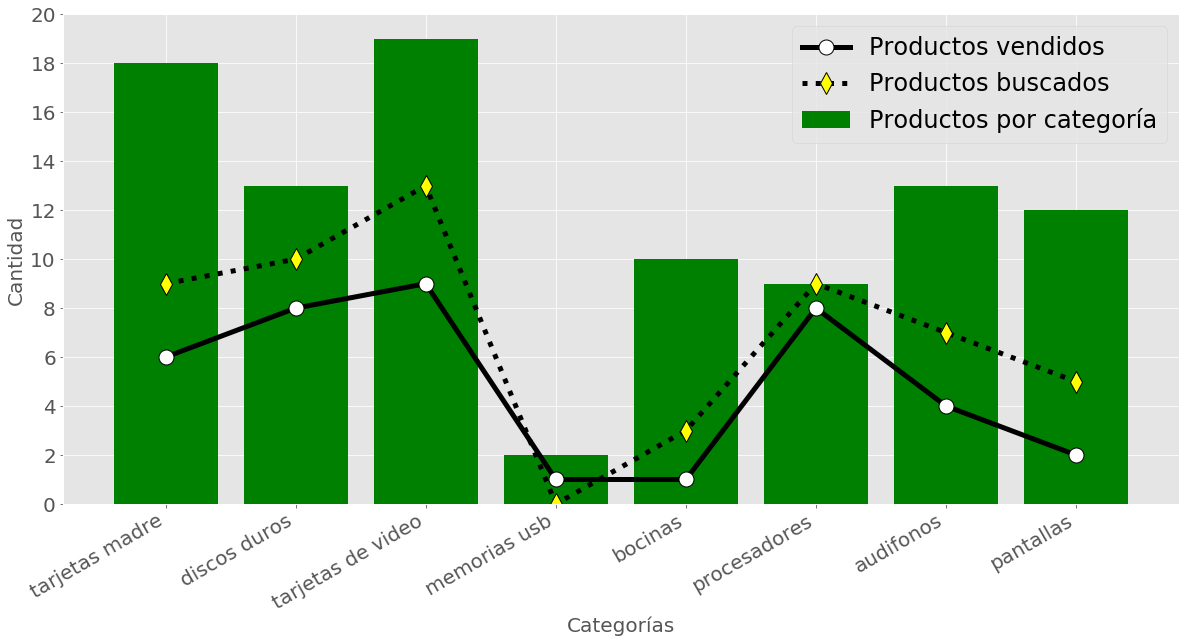

In [14]:
##############################################################
################# Se grafican las categorías #################
##############################################################

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

x = [i+1 for i in range(len(pd_products))]
plt.bar(Categorias, cantidad, color='green', label='Productos por categoría')
plt.plot(Categorias, productos_vendidos, '-o', color='black', mfc='white', linewidth=5, markersize=15, label='Productos vendidos')
plt.plot(Categorias, productos_buscados, ':d', color='black', mfc='yellow', linewidth=5, markersize=15, label='Productos buscados')

plt.xlabel('Categorías', fontsize=20)
plt.ylabel('Cantidad', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


nsticks=10
y = np.array([int((max(cantidad)+1)/nsticks*i) for i in range(nsticks+1)])
my_yticks = [i for i in y]
plt.yticks(y, my_yticks)
plt.gcf().autofmt_xdate()

plt.legend(loc='best', fontsize=24)